In [149]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [143]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train = datagen.flow_from_directory(
    '/content/drive/MyDrive/Indian-Snakes-Dataset-master',
    target_size=(128, 128),
    class_mode='categorical',
    subset='training',
    batch_size=32,
    color_mode='rgb'
)

val = datagen.flow_from_directory(
    '/content/drive/MyDrive/Indian-Snakes-Dataset-master',
    target_size=(128, 128),
    class_mode='categorical',
    subset='validation',
    batch_size=32,
    color_mode='rgb'
)


Found 1908 images belonging to 13 classes.
Found 467 images belonging to 13 classes.


In [144]:
class_names=list(train.class_indices.keys())
print(class_names)

['Banded Racer', 'Checkered Keelback', 'Common Krait', 'Common Rat Snake', 'Common Sand Boa', 'Common Trinket', 'Green Tree Vine', 'Indian Rock Python', 'King Cobra', 'Monocled Cobra', "Russell's Viper", 'Saw-scaled Viper', 'Spectacled Cobra']


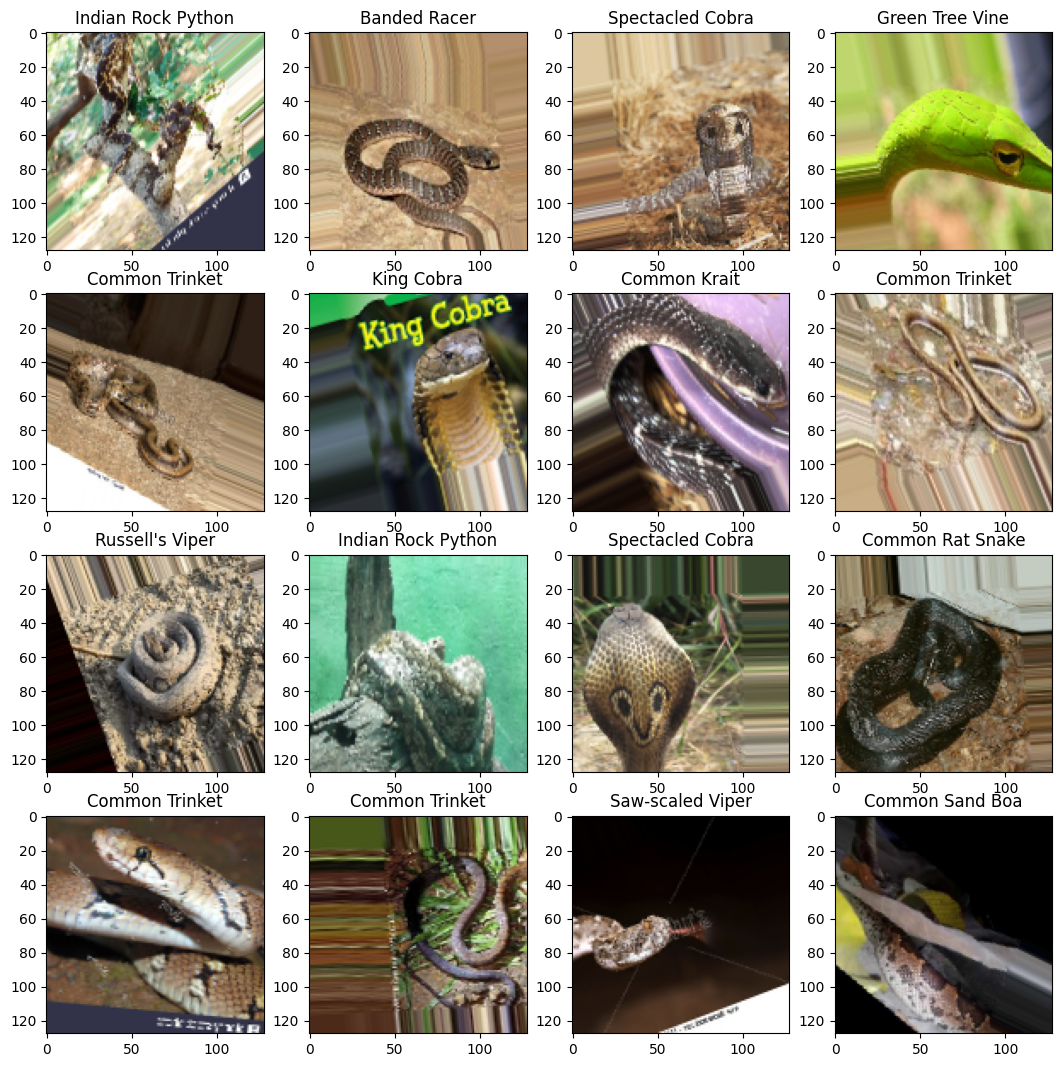

In [158]:
plt.figure(figsize=(13,13))
for x_batch,y_batch in train:
  for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_batch[i])
    plt.title(class_names[np.where(y_batch[i]==1)[0][0]])
  break
  plt.tight_layout()
  plt.show()

In [108]:
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model layers

# Add custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(13, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


In [140]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
early=EarlyStopping(monitor='val_accuracy',patience=15,restore_best_weights=True)
reduce=ReduceLROnPlateau(monitor='val_accuracy',patience=15,factor=0.5)
checkpoint=ModelCheckpoint('best_model.keras',monitor='val_accuracy',save_best_only=True)
callbacks=[early,reduce,checkpoint]

In [110]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [111]:
history = model.fit(
    train,
    validation_data=val,
    epochs=30,
    callbacks=callbacks,  # if you have EarlyStopping or ModelCheckpoint
    shuffle=True
)


Epoch 1/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 55s 747ms/step - accuracy: 0.0993 - loss: 3.4360 - val_accuracy: 0.1970 - val_loss: 2.3742 - learning_rate: 1.0000e-04
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 33s 559ms/step - accuracy: 0.1813 - loss: 2.6920 - val_accuracy: 0.2976 - val_loss: 2.1915 - learning_rate: 1.0000e-04
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 34s 563ms/step - accuracy: 0.2071 - loss: 2.4113 - val_accuracy: 0.3255 - val_loss: 2.0900 - learning_rate: 1.0000e-04
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 34s 564ms/step - accuracy: 0.2600 - loss: 2.2411 - val_accuracy: 0.3576 - val_loss: 1.9748 - learning_rate: 1.0000e-04
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 33s 546ms/step - accuracy: 0.2857 - loss: 2.1168 - val_accuracy: 0.3919 - val_loss: 1.8971 - learning_rate: 1.0000e-04
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 37s 615ms/step - accuracy: 0.3260 - loss: 2.0305 - val_accuracy: 0.3983 - val_loss: 1.8360 - learning_rate: 1.0000e-04
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 32s 539ms/step - acc

In [112]:
history2 = model.fit(
    train,
    validation_data=val,
    epochs=60,  # continue to 60
    initial_epoch=30,  # resume from where you stopped
    callbacks=callbacks,
    shuffle=True
)


Epoch 31/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 34s 572ms/step - accuracy: 0.6039 - loss: 1.2268 - val_accuracy: 0.6081 - val_loss: 1.2247 - learning_rate: 1.0000e-04
Epoch 32/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 33s 543ms/step - accuracy: 0.6272 - loss: 1.1063 - val_accuracy: 0.5739 - val_loss: 1.2899 - learning_rate: 1.0000e-04
Epoch 33/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 32s 535ms/step - accuracy: 0.6291 - loss: 1.1008 - val_accuracy: 0.5739 - val_loss: 1.2286 - learning_rate: 1.0000e-04
Epoch 34/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 33s 556ms/step - accuracy: 0.6217 - loss: 1.1186 - val_accuracy: 0.5824 - val_loss: 1.2706 - learning_rate: 1.0000e-04
Epoch 35/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 32s 533ms/step - accuracy: 0.6565 - loss: 1.0474 - val_accuracy: 0.5696 - val_loss: 1.2988 - learning_rate: 1.0000e-04
Epoch 36/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 32s 530ms/step - accuracy: 0.6459 - loss: 1.0876 - val_accuracy: 0.5760 - val_loss: 1.2547 - learning_rate: 1.0000e-04
Epoch 37/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 33s 547ms/ste

In [121]:
history3 = model.fit(
    train,
    validation_data=val,
    epochs=80,
    initial_epoch=60,
    callbacks=callbacks,
    shuffle=True
)

Epoch 61/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 33s 556ms/step - accuracy: 0.7034 - loss: 0.8191 - val_accuracy: 0.6467 - val_loss: 1.0817 - learning_rate: 5.0000e-05
Epoch 62/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 32s 532ms/step - accuracy: 0.7561 - loss: 0.7549 - val_accuracy: 0.6317 - val_loss: 1.1351 - learning_rate: 5.0000e-05
Epoch 63/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 31s 521ms/step - accuracy: 0.7502 - loss: 0.7705 - val_accuracy: 0.5996 - val_loss: 1.1887 - learning_rate: 5.0000e-05
Epoch 64/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 32s 533ms/step - accuracy: 0.7243 - loss: 0.8025 - val_accuracy: 0.6210 - val_loss: 1.1495 - learning_rate: 5.0000e-05
Epoch 65/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 32s 536ms/step - accuracy: 0.7293 - loss: 0.7996 - val_accuracy: 0.6081 - val_loss: 1.1553 - learning_rate: 5.0000e-05
Epoch 66/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 36s 608ms/step - accuracy: 0.7579 - loss: 0.7508 - val_accuracy: 0.6081 - val_loss: 1.1288 - learning_rate: 5.0000e-05
Epoch 67/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 31s 524ms/ste

In [128]:
# Combine history objects
combined_acc      = history.history['accuracy'] + history2.history['accuracy'] + history3.history['accuracy']
combined_val_acc  = history.history['val_accuracy'] + history2.history['val_accuracy'] + history3.history['val_accuracy']
combined_loss     = history.history['loss'] + history2.history['loss'] + history3.history['loss']
combined_val_loss = history.history['val_loss'] + history2.history['val_loss'] + history3.history['val_loss']



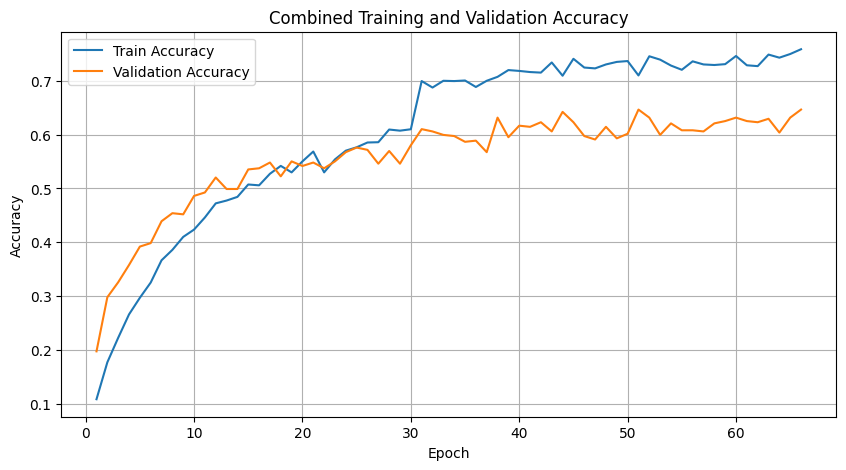

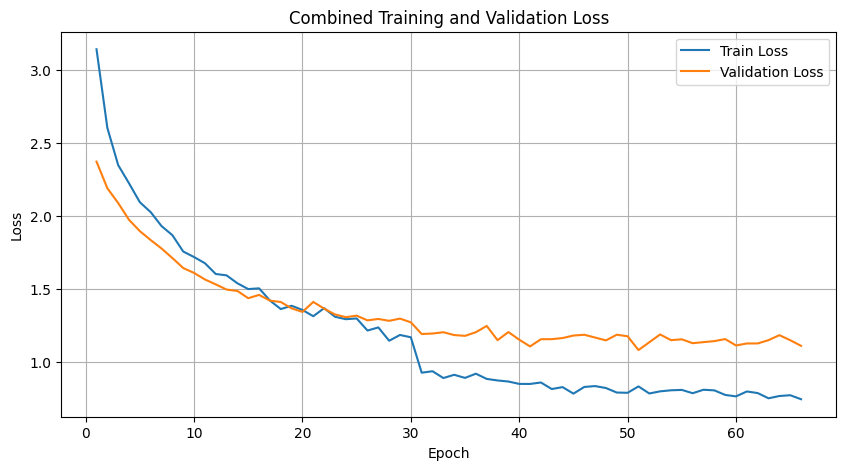

In [129]:
import matplotlib.pyplot as plt

epochs = range(1, len(combined_acc) + 1)

# Accuracy Plot
plt.figure(figsize=(10, 5))
plt.plot(epochs, combined_acc, label='Train Accuracy')
plt.plot(epochs, combined_val_acc, label='Validation Accuracy')
plt.title('Combined Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Plot
plt.figure(figsize=(10, 5))
plt.plot(epochs, combined_loss, label='Train Loss')
plt.plot(epochs, combined_val_loss, label='Validation Loss')
plt.title('Combined Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [141]:
from google.colab import files
files.download('best_model.keras')
import os
print("Saved model path:", os.path.abspath("best_model.keras"))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saved model path: /content/best_model.keras


In [159]:
from tensorflow.keras.models import load_model
model = load_model('best_model.keras')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
img_path=r'/content/drive/MyDrive/Indian-Snakes-Dataset-master/Common Rat Snake/11225995516_f9288eb60a_b.jpg'
# Load and preprocess the image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  
img_array = np.expand_dims(img_array, axis=0)  

# Predict
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

class_indices = train.class_indices  
index_to_class = {v: k for k, v in class_indices.items()}
snake_name = index_to_class[predicted_class]

print("Predicted Snake Name:", snake_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Snake Name: Common Rat Snake
